In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("AllData.csv")

In [3]:
df.head()

,degree,closeness,betwennes,influence
0,0.013599,0.420360,0.000375,0.0
1,0.000186,0.295970,0.000000,0.0
2,0.413376,0.619361,0.018321,1.0
3,0.435358,0.629899,0.020473,1.0
4,0.178651,0.506224,0.003627,0.0


In [4]:
#df = df.drop("Unnamed: 0", axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [5]:
def Scaling(X):
    scaler = StandardScaler()
    X=scaler.fit_transform(X)
    return X
X = Scaling(X)
over= RandomOverSampler()
X,y= over.fit_resample(X,y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
# X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (3,)),
    # tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dense(9, activation='sigmoid'),
    # tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer=tf.keras.optimizers.Adam(),
                         loss=["mse"],
                            metrics=['accuracy'])

In [8]:
model.evaluate(X_train,y_train)

376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2060 - loss: 0.3711


[0.3702179789543152, 0.2046588957309723]

In [10]:
model.fit(X_train, y_train, batch_size=16, epochs=50)

Epoch 1/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9680 - loss: 0.0322
Epoch 2/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 0.0305
Epoch 3/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9654 - loss: 0.0331
Epoch 4/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9668 - loss: 0.0309
Epoch 5/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9685 - loss: 0.0303
Epoch 6/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9678 - loss: 0.0317
Epoch 7/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9702 - loss: 0.0294
Epoch 8/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9676 - loss: 0.0305
Epoch 9/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9698 - loss: 0.0282
Epoch 10/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9703 - loss: 0.0286
Epoch 11/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9672 - loss: 0.0296
Epoch 12/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

ValueError: Expected 2D array, got 1D array instead:
array=[0.42036022 0.29596956 0.61936079 ... 0.41560855 0.41641455 0.41567291].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
model.evaluate(X_test, y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.0256


[0.02667606994509697, 0.9710482358932495]

In [12]:
y_test[y_test==1]

array([1., 1., 1., ..., 1., 1., 1.])

In [13]:
y_pred = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
pred = [1 if ty>0.5 else 0 for ty in y_pred]
pred

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [16]:
from sklearn.metrics import confusion_matrix

m = confusion_matrix(pred,y_test)
m

array([[2845,   12],
       [ 162, 2991]], dtype=int64)

In [55]:
y_test.iloc[85]

0.0

In [33]:
y_tr = model.predict(X_train)
y_tr

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.9999988e-01],
       [6.6613781e-26],
       [2.7592124e-24],
       ...,
       [9.9999994e-01],
       [0.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (3,)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    # tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         loss=[tf.keras.losses.binary_crossentropy],
                            metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=16)


Epoch 1/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9648 - loss: 0.0887
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9969 - loss: 0.0175
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.1562
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0184
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0024
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9984 - loss: 0.0256
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9996 - loss: 0.0053
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9984 - loss: 0.0231
Epoch 9/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9995 - loss: 0.0061
Epoch 10/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9947 - loss: 0.0757
Epoch 11/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9972 - loss: 0.0443
Epoch 12/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (3,)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01),
                         loss=[tf.keras.losses.binary_crossentropy],
                            metrics=['accuracy'])


In [63]:
model.evaluate(X_test, y_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0193


[0.01932060532271862, 0.9995303153991699]

In [29]:
X

array([[ 0.02735093,  0.74664836,  0.02572573],
       [-0.31017488, -1.1955116 , -0.18320424],
       [10.08749533,  3.85372219, 10.01127787],
       ...,
       [ 6.38408709,  2.74445027,  4.0819672 ],
       [ 6.09812772,  2.61441118,  3.81715626],
       [10.58909619,  4.00558241, 11.17193506]])

In [68]:
y_p = model.predict(X_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [69]:
y_p

array([[2.3102170e-05],
       [2.3102170e-05],
       [9.8631513e-01],
       ...,
       [9.9967897e-01],
       [2.3102170e-05],
       [2.3102170e-05]], dtype=float32)

In [74]:
for yt, yp in zip(y_test, y_p):
    print(yt-yp)

[-2.310217e-05]
[-2.310217e-05]
[0.01368487]
[0.00039631]
[-2.310217e-05]
[-2.310217e-05]
[0.0003255]
[0.00053775]
[0.00053775]
[-2.310217e-05]
[-2.310217e-05]
[0.00032145]
[-2.310217e-05]
[-2.310217e-05]
[0.00036532]
[0.00032204]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[0.00032771]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[0.00032771]
[-2.310217e-05]
[-2.310217e-05]
[0.00032103]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[0.00033003]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[0.00032085]
[0.000377]
[0.00088108]
[0.00032425]
[-2.310217e-05]
[-2.310217e-05]
[0.0003255]
[-2.310217e-05]
[0.00212336]
[0.00036222]
[0.00032204]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[0.00032204]
[-2.310217e-05]
[0.00033009]
[0.00033009]
[-2.310217e-05]
[-2.310217e-05]
[0.00032139]
[0.00032097]
[0.0003221]
[0.00033671]
[-2.310217e-05]
[0.00032085]
[0.00033218]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[-2.310217e-05]
[-2.

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8968 - loss: 0.0631 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9467 - loss: 0.0537 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9417 - loss: 0.0538 - val_accuracy: 1.0000 - val_loss: 0.0091
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9515 - loss: 0.0515 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9450 - loss: 0.0556 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9615 - loss: 0.0484 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9502 - loss: 0.0481 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9484 - loss: 0.0493 - val_accuracy: 1.0000 - val_los

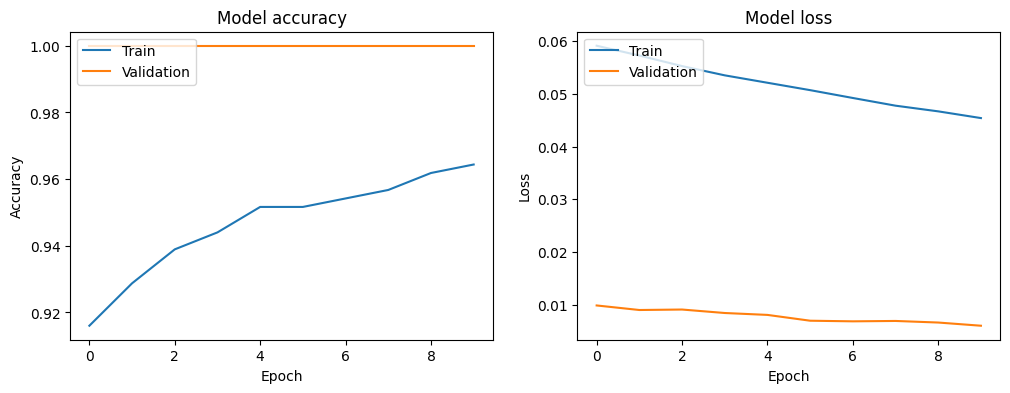

In [44]:
from matplotlib import pyplot as plt

history = model.fit(XT, YT, epochs=10, batch_size=32, validation_split=0.2)


    # history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

    # Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')    
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [51]:
dat = pd.read_csv("Data.csv")

XT = dat.iloc[:,2:-1].values
XT = Scaling(XT)
YT = dat.iloc[:, -1].values



In [57]:
yp = model.predict(XT)

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [58]:
ypp = [1 if y_>0.5 else 0 for y_ in yp]

In [59]:
m = confusion_matrix(ypp,YT)
m

array([[3632,   11],
       [   4,  392]], dtype=int64)

In [60]:
model.evaluate(XT, YT)

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9952 - loss: 0.0125


[0.012163420207798481, 0.9962862133979797]

In [56]:
model.fit(XT, YT, epochs=20, batch_size=16)

Epoch 1/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.0382
Epoch 2/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0241
Epoch 3/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9881 - loss: 0.0201
Epoch 4/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9898 - loss: 0.0197
Epoch 5/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.0160
Epoch 6/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.0153
Epoch 7/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9937 - loss: 0.0159
Epoch 8/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9957 - loss: 0.0146
Epoch 9/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0140
Epoch 10/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0146
Epoch 11/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9943 - loss: 0.0150
Epoch 12/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [42]:
len(YT[YT==0])

443

In [43]:
max(ypp)

0

In [82]:
dolphins = pd.read_csv("soc-dolphins.mtx", names=['0','1'], sep=' ')

In [83]:
dolphins.head()

,0,1
0,11,1
1,15,1
2,16,1
3,41,1
4,43,1


In [84]:
Gr = nx.from_pandas_edgelist(dolphins, "0", "1")

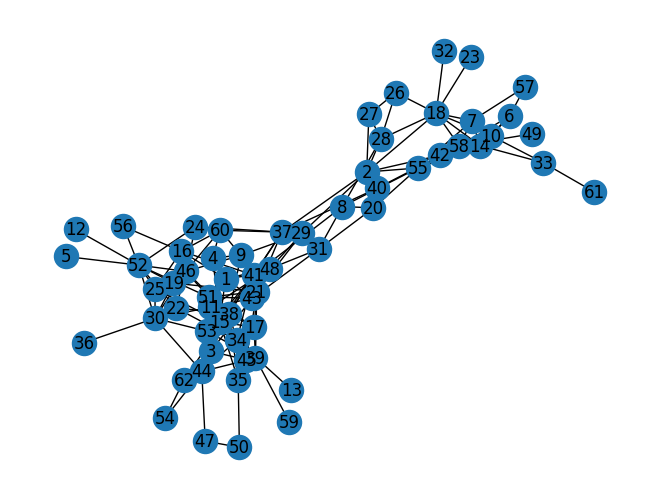

In [91]:
nx.draw(Gr, with_labels=True)

In [121]:
degre = Gr.degree(13)
degre

1

In [88]:
degree = nx.degree_centrality(Gr)
closeness = nx.closeness_centrality(Gr)
betweenes= nx.betweenness_centrality(Gr)

In [89]:
data = pd.DataFrame({"degree":[], "closeness":[], "betwennes":[], "influence":[]})
for d, c, b in zip(list(degree.values()),list(closeness.values()),list(betweenes.values())):
    included = [d,c,b, (d+c+b)/3]
    data.loc[len(data)] = included

In [90]:
data.to_csv("Dolphine_csv.csv")

In [129]:
print(data.iloc[1],
degree[1])

degree       0.098361
closeness    0.346591
betwennes    0.019083
influence    0.154678
Name: 1, dtype: float64 0.09836065573770492


In [109]:
print(degree.values())

dict_values([0.0819672131147541, 0.09836065573770492, 0.19672131147540983, 0.11475409836065574, 0.13114754098360656, 0.09836065573770492, 0.09836065573770492, 0.14754098360655737, 0.13114754098360656, 0.06557377049180328, 0.04918032786885246, 0.0819672131147541, 0.0819672131147541, 0.11475409836065574, 0.0819672131147541, 0.11475409836065574, 0.06557377049180328, 0.06557377049180328, 0.04918032786885246, 0.09836065573770492, 0.04918032786885246, 0.0819672131147541, 0.1639344262295082, 0.01639344262295082, 0.11475409836065574, 0.06557377049180328, 0.13114754098360656, 0.03278688524590164, 0.14754098360655737, 0.09836065573770492, 0.0819672131147541, 0.0819672131147541, 0.14754098360655737, 0.18032786885245902, 0.18032786885245902, 0.04918032786885246, 0.14754098360655737, 0.01639344262295082, 0.1639344262295082, 0.01639344262295082, 0.09836065573770492, 0.09836065573770492, 0.0819672131147541, 0.13114754098360656, 0.11475409836065574, 0.11475409836065574, 0.06557377049180328, 0.11475409

In [111]:
data.iloc[0]

degree       0.081967
closeness    0.312821
betwennes    0.016092
influence    0.136960
Name: 0, dtype: float64

In [123]:
data.iloc[13]

degree       0.114754
closeness    0.417808
betwennes    0.248237
influence    0.260267
Name: 13, dtype: float64

In [118]:
degree.values()

dict_values([0.0819672131147541, 0.09836065573770492, 0.19672131147540983, 0.11475409836065574, 0.13114754098360656, 0.09836065573770492, 0.09836065573770492, 0.14754098360655737, 0.13114754098360656, 0.06557377049180328, 0.04918032786885246, 0.0819672131147541, 0.0819672131147541, 0.11475409836065574, 0.0819672131147541, 0.11475409836065574, 0.06557377049180328, 0.06557377049180328, 0.04918032786885246, 0.09836065573770492, 0.04918032786885246, 0.0819672131147541, 0.1639344262295082, 0.01639344262295082, 0.11475409836065574, 0.06557377049180328, 0.13114754098360656, 0.03278688524590164, 0.14754098360655737, 0.09836065573770492, 0.0819672131147541, 0.0819672131147541, 0.14754098360655737, 0.18032786885245902, 0.18032786885245902, 0.04918032786885246, 0.14754098360655737, 0.01639344262295082, 0.1639344262295082, 0.01639344262295082, 0.09836065573770492, 0.09836065573770492, 0.0819672131147541, 0.13114754098360656, 0.11475409836065574, 0.11475409836065574, 0.06557377049180328, 0.11475409

In [130]:
data.tail()

,degree,closeness,betwennes,influence
57,0.032787,0.335165,0.070517,0.146156
58,0.016393,0.248980,0.000000,0.088458
59,0.032787,0.256303,0.003008,0.097366
60,0.032787,0.259574,0.001193,0.097851
61,0.016393,0.232824,0.000000,0.083073


In [139]:
print(degree[36], degree[55], closeness[36], closeness[55], betweenes[36], betweenes[55])

0.01639344262295082 0.11475409836065574 0.24497991967871485 0.324468085106383 0.0 0.09912164676351941
